In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-06 19:24:33.644252: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 19:24:33.937249: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 19:24:34.621992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/RJ_Reconstrucao_Sparidae_2024_08_15.xlsx')

df_Pargo = pd.DataFrame(df[['Ano','Pargo_art','Pargo_ind','Pargo_art_ind']])

#Somando art e ind em art_ind
for i in range(len(df_Pargo['Ano'])):
  if pd.isnull(df_Pargo.iloc[i,3])==True and pd.isnull(df_Pargo.iloc[i,2])==False and pd.isnull(df_Pargo.iloc[i,1])==False:
    df_Pargo.iloc[i,3] = df_Pargo.iloc[i,2] + df_Pargo.iloc[i,1] 


dados = df_Pargo[['Ano','Pargo_art','Pargo_art_ind']].dropna().reset_index(drop=True)

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Pargo_art'] = dados.loc[i,'Pargo_art'] / dados.loc[i,'Pargo_art_ind']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1966,1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()



prop = dados['Prop_Pargo_art'].values

dados.head()

,Ano,Pargo_art,Pargo_art_ind,Prop_Pargo_art
0,1978,21.0,32.0,0.656250
1,1979,59.0,95.0,0.621053
2,1980,78.0,93.0,0.838710
3,1981,109.0,179.0,0.608939
4,1982,204.0,241.0,0.846473


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [14]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=400, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Pargo/pesos prop art/.weights.h5', overwrite=True)

Epoch 1/400


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0028  
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9291 
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8547 
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7782 
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7019 
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6950 
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6251 
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5632 
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5445 
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5115 
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5764 
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5600 
Epoch 13/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5679 
Epoch 14/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5545 
Epoch 15/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5370 
Epoch 16/400
2/2 ━━━━━━━━━━━━━

In [15]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Pargo/pesos prop art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.91574717]
 [0.7846652 ]
 [0.7711276 ]]


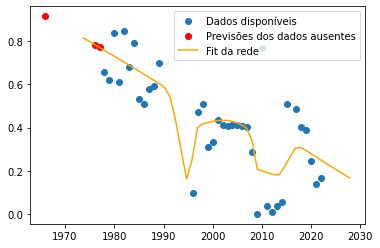

In [16]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

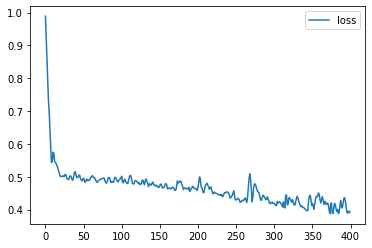

In [17]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [18]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


df_preenchido = df[['Ano','Pargo_art']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'Pargo_art']=df.loc[i,'Pargo_art_ind']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Pargo/Previsão Pargo_art_1962-1970.xlsx')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
     Ano   Pargo_art
0   1950         NaN
1   1951         NaN
2   1952         NaN
3   1953         NaN
4   1954         NaN
5   1955         NaN
6   1956         NaN
7   1957         NaN
8   1958         NaN
9   1959         NaN
10  1960         NaN
11  1961         NaN
12  1962         NaN
13  1963         NaN
14  1964         NaN
15  1965         NaN
16  1966  168.497498
17  1967         NaN
18  1968         NaN
19  1969         NaN
20  1970         NaN
21  1971         NaN
22  1972         NaN
23  1973         NaN
24  1974         NaN
25  1975         NaN
26  1976  244.030853
27  1977   50.123291
28  1978   21.000000
29  1979   59.000000
30  1980   78.000000
31  1981  109.000000
32  1982  204.000000
33  1983  305.000000
34  1984  376.000000
35  1985  403.000000
36  1986  365.000000
37  1987  413.000000
38  1988  863.000000
39  1989  756.000000
40  1990         NaN
41  1991         NaN
42  1992         NaN
43  1993         NaN
44  1994         

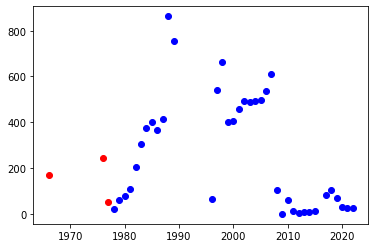

In [19]:
for i in range(len(df_preenchido['Ano'])):
  if i+1950 in anos_para_prever:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Pargo_art'].values[i],color='red')
  else:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Pargo_art'].values[i],color='blue')